


#Análisis del DataSet




In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import re
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
prop = pd.read_csv("properatti.csv",sep=',') #tenemos un archivo .csv -comma separated values- de 150 MB

In [3]:
prop.info()
#el dataset consta de un total de 26 columnas e inicialmente 121.220 registros

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
Unnamed: 0                    121220 non-null int64
operation                     121220 non-null object
property_type                 121220 non-null object
place_name                    121197 non-null object
place_with_parent_names       121220 non-null object
country_name                  121220 non-null object
state_name                    121220 non-null object
geonames_id                   102503 non-null float64
lat-lon                       69670 non-null object
lat                           69670 non-null float64
lon                           69670 non-null float64
price                         100810 non-null float64
currency                      100809 non-null object
price_aprox_local_currency    100810 non-null float64
price_aprox_usd               100810 non-null float64
surface_total_in_m2           81892 non-null float64
surface_covered_in_m2         101313 no

In [4]:
prop.columns # traes las "etiquetas"/"labels" de las columnas

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

In [5]:
prop['Unnamed: 0'].unique() #es un contador de registros

array([     0,      1,      2, ..., 121217, 121218, 121219])

In [6]:
prop['operation'].unique() #son todos ventas, se podria borrar

array(['sell'], dtype=object)

In [7]:
prop['property_type'].unique() #devuelve los valores únicos de una serie
                               #"store" / "tienda" lo separaria para hacer un analisis aparte 
                               #porque seguramente el modelo predictor \
                               # deba ser otro

array(['PH', 'apartment', 'house', 'store'], dtype=object)

In [8]:
prop['place_name'].unique()

array(['Mataderos', 'La Plata', 'Liniers', ..., 'Laguna Paiva',
       'Malabrigo', 'Altos de Hudson I'], dtype=object)

In [9]:
prop['place_with_parent_names'].unique()

array(['|Argentina|Capital Federal|Mataderos|',
       '|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|',
       '|Argentina|Capital Federal|Liniers|', ...,
       '|Argentina|Santa Fe|Laguna Paiva|',
       '|Argentina|Santa Fe|Malabrigo|',
       '|Argentina|Bs.As. G.B.A. Zona Sur|Berazategui|Altos de Hudson I|'],
      dtype=object)

In [10]:
prop['country_name'].unique() # todos los registros corresponden a Argentina, es una columna sin valor para nosostros

array(['Argentina'], dtype=object)

In [11]:
prop['state_name'].unique() #corresponde al nombre de Provincia, salvo GBA que lo separa por zona

array(['Capital Federal', 'Bs.As. G.B.A. Zona Sur',
       'Buenos Aires Costa Atlántica', 'Entre Ríos',
       'Bs.As. G.B.A. Zona Norte', 'Santa Fe', 'Córdoba',
       'Bs.As. G.B.A. Zona Oeste', 'Misiones', 'Buenos Aires Interior',
       'Salta', 'Neuquén', 'Río Negro', 'San Luis', 'Mendoza',
       'Corrientes', 'Chubut', 'Tucumán', 'La Pampa', 'Chaco', 'San Juan',
       'Santa Cruz', 'Tierra Del Fuego', 'Catamarca',
       'Santiago Del Estero', 'Jujuy', 'La Rioja', 'Formosa'],
      dtype=object)

In [12]:
prop['price'].dtype

dtype('float64')

In [13]:
prop['expenses'].describe()

count       14,262.00
mean         5,009.23
std        120,440.26
min              1.00
25%          1,000.00
50%          2,000.00
75%          4,000.00
max     10,001,500.00
Name: expenses, dtype: float64

In [14]:
prop['currency'].unique()

array(['USD', nan, 'ARS', 'PEN', 'UYU'], dtype=object)

In [15]:
prop['currency'].value_counts() #value counts returnea una serie 

USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64

In [16]:
prop[(prop['currency']=='UYU')] ## registros con distinta moneda y sin informacion de m2 y sup2,
                                ## a eliminar

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
107390,107390,sell,house,San Roque,|Argentina|Mendoza|San Roque|,Argentina,Mendoza,"3,836,586.00",NaN,nan,...,nan,nan,nan,nan,nan,nan,http://www.properati.com.ar/1by0s_venta_casa_s...,"Casa con Calefacción central, Mendoza, San Roq...",Casa - San Vicente,https://thumbs4.properati.com/2/pA0RbuDKRK6GgV...


In [17]:
prop.loc[107390]

Unnamed: 0                                                               107390
operation                                                                  sell
property_type                                                             house
place_name                                                            San Roque
place_with_parent_names                           |Argentina|Mendoza|San Roque|
country_name                                                          Argentina
state_name                                                              Mendoza
geonames_id                                                        3,836,586.00
lat-lon                                                                     NaN
lat                                                                         NaN
lon                                                                         NaN
price                                                            650,000,000.00
currency                                

In [18]:
# El registro en moneda uruguaya no presenta información consistente
prop.drop(index=107390,axis=0,inplace=True)

In [19]:
prop[(prop['currency']=='UYU')]

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail


In [20]:
prop[(prop['currency']=='PEN')] ## registros con distinta moneda y sin informacion de m2 y sup2, a eliminar
                                ## Refiere a PEN == Sol Peruano

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
50387,50387,sell,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,"3,433,955.00",NaN,nan,...,nan,nan,nan,nan,nan,nan,http://www.properati.com.ar/19e8z_venta_depart...,Ref.: 55:PREVENTA ::: OPORTUNIDAD ::: Dúplex a...,DUPLEX A LA VENTA | Liniers 1200 | Tandil,https://thumbs4.properati.com/9/N_Qr_5X_vOq--b...
50388,50388,sell,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,"3,433,955.00",NaN,nan,...,nan,nan,nan,nan,nan,nan,http://www.properati.com.ar/19e90_venta_depart...,Ref.: 56Duplex en venta de 1 dormitorio con ap...,DUPLEX A LA VENTA | Liniers 1200 | Tandil,https://thumbs4.properati.com/8/_cBXAyr_9pDySg...


In [21]:
prop.loc[50387] #este registro es una preventa, borramos las preventas?

Unnamed: 0                                                                50387
operation                                                                  sell
property_type                                                         apartment
place_name                                                      Capital Federal
place_with_parent_names                             |Argentina|Capital Federal|
country_name                                                          Argentina
state_name                                                      Capital Federal
geonames_id                                                        3,433,955.00
lat-lon                                                                     NaN
lat                                                                         NaN
lon                                                                         NaN
price                                                                380,000.00
currency                                

In [22]:
prop.drop(index=50387,axis=0,inplace=True)

In [23]:
prop.loc[50388] # este registro se puede conservar ya que tiene precio en u$s se puede inferir
                # por tipo de propiedad y precio los m2 o estimarlo por zona

Unnamed: 0                                                                50388
operation                                                                  sell
property_type                                                         apartment
place_name                                                      Capital Federal
place_with_parent_names                             |Argentina|Capital Federal|
country_name                                                          Argentina
state_name                                                      Capital Federal
geonames_id                                                        3,433,955.00
lat-lon                                                                     NaN
lat                                                                         NaN
lon                                                                         NaN
price                                                                950,000.00
currency                                

In [24]:
#Verificamos que solo queda el registro que conservaremos
prop[(prop['currency']=='PEN')]

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
50388,50388,sell,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,"3,433,955.00",NaN,nan,...,nan,nan,nan,nan,nan,nan,http://www.properati.com.ar/19e90_venta_depart...,Ref.: 56Duplex en venta de 1 dormitorio con ap...,DUPLEX A LA VENTA | Liniers 1200 | Tandil,https://thumbs4.properati.com/8/_cBXAyr_9pDySg...


In [25]:
# Eliminamos los valores redundantes para nuestro análisis:
# Country_name y Operation que lo demostramos antes
# ELiminamos tb image_thumbnail y properati_url porque no son relevante para nuestro análisis

prop.drop(['image_thumbnail', 'properati_url','operation','country_name',], axis=1, inplace=True)
prop.columns

Index(['Unnamed: 0', 'property_type', 'place_name', 'place_with_parent_names',
       'state_name', 'geonames_id', 'lat-lon', 'lat', 'lon', 'price',
       'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'description', 'title'],
      dtype='object')

In [26]:
# Remplazaremos nombres de columnas y reorganizaremos su orden

prop.columns = ['id', 't_prop', 'localidad', 'lugar_completo',
       'provincia', 'geonames_id', 'lat-lon', 'lat', 'lon', 'precio_original',
       'moneda_original', 'precio_$', 'precio_u$s_aprox',
       'sup_tot_m2', 'sup_cub_m2', 'precio_m2_u$s',
       'precio_m2', 'piso', 'ambientes', 'expenses?', 'descr', 'tit']

In [27]:
prop.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,"121,218.00",NaN,NaN,NaN,"60,609.20","34,993.36",0.00,"30,304.25","60,609.50","90,913.75","121,219.00"
t_prop,121218,4,apartment,71064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
localidad,121195,1060,Córdoba,9254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lugar_completo,121218,1164,|Argentina|Santa Fe|Rosario|,8504,NaN,NaN,NaN,NaN,NaN,NaN,NaN
provincia,121218,28,Capital Federal,32315,NaN,NaN,NaN,NaN,NaN,NaN,NaN
geonames_id,"102,501.00",NaN,NaN,NaN,"3,574,441.13","354,132.86","3,427,208.00","3,430,234.00","3,433,910.00","3,836,668.00","6,948,895.00"
lat-lon,69670,47203,"-34.4026444,-58.6684776",312,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,"69,670.00",NaN,NaN,NaN,-34.63,1.98,-54.82,-34.67,-34.60,-34.44,4.55
lon,"69,670.00",NaN,NaN,NaN,-59.27,2.30,-75.68,-58.73,-58.48,-58.40,-53.73
precio_original,"100,808.00",NaN,NaN,NaN,"462,083.55","960,716.99",0.00,"110,000.00","185,000.00","420,000.00","99,999,999.00"


In [28]:
m2_uss_provincia = prop.pivot_table(['precio_m2_u$s'],index=['provincia'],\
                                    columns='t_prop',aggfunc=['mean'])
m2_uss_provincia.head(5)

mean                            
                             precio_m2_u$s                            
t_prop                                  PH apartment    house    store
provincia                                                             
Bs.As. G.B.A. Zona Norte          1,451.71  2,539.87 1,339.76 1,862.01
Bs.As. G.B.A. Zona Oeste          1,224.02  1,720.75 1,081.63 1,556.95
Bs.As. G.B.A. Zona Sur            1,114.01  1,889.98 1,164.50 1,541.02
Buenos Aires Costa Atlántica      1,156.45  1,958.84   749.15 1,401.05
Buenos Aires Interior             1,019.89  1,634.00   643.24   987.67

In [29]:
m2_uss_localidad = prop.pivot_table('precio_m2_u$s',index=['localidad'],\
                                    columns='t_prop',aggfunc=['mean'])
m2_uss_localidad.head()

mean                            
t_prop                        PH apartment    house    store
localidad                                                   
 Country Maschwitz Club      nan       nan 1,369.99      nan
 los alamos                  nan  1,600.00      nan      nan
9 de Abril                   nan       nan    94.02   181.82
Abasto                  1,570.49  2,187.31 1,432.70 2,080.29
Abril Club de Campo          nan       nan 1,207.87      nan

In [30]:
#Chequeo duplicados

#Al parecer, tenemos 5080 registros duplicados

t_prop_dupli = prop.iloc[:,1:].duplicated() == True
t_prop_dupli.sum()

5080

In [31]:
#Creo columna en dataframe prop que identifica registros duplicados
prop['duplicados'] = list(t_prop_dupli)

In [32]:
prop['duplicados'].value_counts()

False    116138
True       5080
Name: duplicados, dtype: int64

In [33]:
#Eliminamos las filas repetidas
#no funciono: prop.drop(prop.loc[prop.duplicados == True],axis=0,inplace=True)

prop_sin_dupli = prop[(prop.duplicados == False)]

In [34]:
#verificamos haber borrados los registros duplicados

prop_sin_dupli['duplicados'].value_counts()

False    116138
Name: duplicados, dtype: int64

In [35]:
prop_sin_dupli.info()

#Pasamos de 121.220 registros originales - duplicados (5.080) = 116.138 valores únicos!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116138 entries, 0 to 121219
Data columns (total 23 columns):
id                  116138 non-null int64
t_prop              116138 non-null object
localidad           116115 non-null object
lugar_completo      116138 non-null object
provincia           116138 non-null object
geonames_id         97958 non-null float64
lat-lon             67851 non-null object
lat                 67851 non-null float64
lon                 67851 non-null float64
precio_original     98582 non-null float64
moneda_original     98581 non-null object
precio_$            98582 non-null float64
precio_u$s_aprox    98582 non-null float64
sup_tot_m2          77762 non-null float64
sup_cub_m2          97287 non-null float64
precio_m2_u$s       66851 non-null float64
precio_m2           85697 non-null float64
piso                7659 non-null float64
ambientes           46199 non-null float64
expenses?           14085 non-null float64
descr               116136 non-nu

In [36]:
 # Notamos un hecho relevante: todas las localidades que faltan corresponden a Tigre, PBA

prop_sin_dupli.loc[prop_sin_dupli['localidad'].isnull()]

,id,t_prop,localidad,lugar_completo,provincia,geonames_id,lat-lon,lat,lon,precio_original,...,sup_tot_m2,sup_cub_m2,precio_m2_u$s,precio_m2,piso,ambientes,expenses?,descr,tit,duplicados
6489,6489,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Bs.As. G.B.A. Zona Norte,nan,"-34.4008968545,-58.63809847",-34.40,-58.64,"650,000.00",...,240.00,240.00,"2,708.33","2,708.33",nan,nan,nan,"Espectacular casa moderna de una planta, con a...",Venta de casa en Santa María de Tigre,False
10201,10201,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Bs.As. G.B.A. Zona Norte,nan,"-34.400704,-58.638067",-34.40,-58.64,"535,000.00",...,nan,300.00,nan,"1,783.33",nan,5.00,nan,Corredor Responsable: SABRINA COCCONI - CSI 62...,VENTA CASA SANTA MARÍA DE TIGRE COUNTRY BARRIO...,False
11451,11451,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Bs.As. G.B.A. Zona Norte,nan,"-34.4026880384,-58.6262613379",-34.40,-58.63,"550,000.00",...,"2,170.00",270.00,253.46,"2,037.04",nan,nan,nan,MUY LINDA CASA EN EXCELENTE UBICACION!! Superf...,SANTA MARIA DE TIGRE IMPECABLE,False
14839,14839,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Bs.As. G.B.A. Zona Norte,nan,"-34.4007994779,-58.6381735719",-34.40,-58.64,"480,000.00",...,240.00,200.00,"2,000.00","2,400.00",nan,nan,nan,Muy linda casa de estilo clásico.-Planta baja;...,Venta de casa en Santa María de Tigre,False
18622,18622,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Bs.As. G.B.A. Zona Norte,nan,"-34.4032781195,-58.6263503945",-34.40,-58.63,"1,297,000.00",...,340.00,340.00,"3,814.71","3,814.71",nan,nan,nan,Casa con increible vista al lago con playa de...,Casa con increible vista al lago con playa y m...,False
21922,21922,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Bs.As. G.B.A. Zona Norte,nan,"-34.399704,-58.638405",-34.40,-58.64,"440,000.00",...,nan,220.00,nan,"2,000.00",nan,5.00,nan,Corredor Responsable: Matias Castelli - CUCICB...,Venta Casa - Barrio Santa Maria de Tigre,False
23664,23664,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Bs.As. G.B.A. Zona Norte,nan,"-34.4005161998,-58.6417999185",-34.40,-58.64,"480,000.00",...,294.00,294.00,"1,632.65","1,632.65",nan,nan,nan,EXCELENTE CASA CLASICA con grandes ventanas y ...,CASA EN VENTA EN SANTA MARIA DE TIGRE CON RENTA,False
24722,24722,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Bs.As. G.B.A. Zona Norte,nan,"-34.4007292,-58.6377783",-34.40,-58.64,"530,000.00",...,316.00,270.00,"1,677.22","1,962.96",nan,nan,nan,"EN EXCLUSIVIDAD!!!!!!Lindísima casa, muy lumin...",Venta de casa en Santa María de Tigre,False
38856,38856,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Bs.As. G.B.A. Zona Norte,nan,"-34.425087,-58.5796585",-34.43,-58.58,"1,350,000.00",...,nan,550.00,nan,"2,454.55",nan,nan,nan,SANTA MARIA DE TIGRE- AL RIO - ESPECTACULAR CA...,"Casa (barrio cerrado), Venta",False
45970,45970,apartment,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Bs.As. G.B.A. Zona Norte,nan,"-34.396074,-58.63738",-34.40,-58.64,"95,000.00",...,55.00,27.00,"1,727.27","3,518.52",nan,1.00,nan,"EDIFICIO ZERENA – EL PALMAR, NORDELTA. Torre 2...",Excelente monoambiente. Barrio El Palmar. Con...,False


In [37]:
#Este registro en particular también es de Tigre
prop_sin_dupli.loc[7367 ,:]
prop_sin_dupli.loc[7367 ,"localidad"]= 'Tigre'

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [38]:
# Le asignamos a las localidades faltantes la correspondiente: la totalidad de las mismas se encontraba en Tigre, PBA

prop_sin_dupli.loc[(prop_sin_dupli['localidad'].isnull() == True),['localidad']] = 'Tigre'

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [39]:
# verificamos que no haya quedado ninguna localidad vacia 

prop_sin_dupli['localidad'].isnull().sum()

0

In [40]:
# creamos un DataFrame temporal (t_precios) donde vamos a guardar solamente todos los datos de precios

t_precios = prop_sin_dupli.copy()
t_precios.drop(['t_prop','localidad','lugar_completo','provincia','geonames_id','lat-lon',
'lat','lon','descr','tit','duplicados','piso','expenses?','ambientes'],inplace=True,axis=1)

In [41]:
# Identificamos el Tipo de Cambio a utilizar para la conversion de u$s a $ y lo guardamos un una variable tc (tipo de cambio)

tc = (prop_sin_dupli[prop_sin_dupli["moneda_original"] == "USD"]["precio_$"] / \
      prop_sin_dupli[prop_sin_dupli["moneda_original"] == "USD"]["precio_original"])\
      .mode().copy()
tc

0   17.64
dtype: float64

In [62]:
prop_sin_dupli.pivot_table(values='ambientes',index='t_prop',aggfunc='count',margins=True)

,ambientes
t_prop,
PH,3184
apartment,30427
house,12485
store,103
All,46199


In [63]:
# verificamos

t_precios.sample(10)

# se observa que el precio_$ (ars) dividido el tc arroja el precio_u$s_aprox.
# se observa además que partiendo el precio_u$s_aprox dividido:
#       el precio_m2_u$s se obtiene la sup_tot_m2 y
#       el precio_m2 se obtiene la sup_cub_m2
# los valores que arroja el cociente precio_$ dividido precios_m2 dan como resultado 
# superficies muy grandes, prácticamente inexistentes para el tipo de propiedades ph, apartment,
# y houses
# solo cuando la moneda original es ARS, se puede tomar el precio_m2 como valor válido

,id,precio_original,moneda_original,precio_$,precio_u$s_aprox,sup_tot_m2,sup_cub_m2,precio_m2_u$s,precio_m2
25252,25252,"120,000.00",USD,"2,117,340.00","120,000.00",280.00,200.00,428.57,600.00
94136,94136,"125,000.00",USD,"2,205,562.50","125,000.00",61.00,61.00,"2,049.18","2,049.18"
3388,3388,nan,NaN,nan,nan,"1,638.00",438.00,nan,nan
113471,113471,"88,000.00",USD,"1,552,716.00","88,000.00",40.00,35.00,"2,200.00","2,514.29"
7898,7898,"365,000.00",USD,"6,440,242.50","365,000.00",77.00,77.00,"4,740.26","4,740.26"
113125,113125,"120,000.00",USD,"2,117,340.00","120,000.00",700.00,180.00,171.43,666.67
52047,52047,"104,000.00",USD,"1,835,028.00","104,000.00",44.00,32.00,"2,363.64","3,250.00"
18483,18483,"62,000.00",USD,"1,093,959.00","62,000.00",34.00,34.00,"1,823.53","1,823.53"
44700,44700,"49,900.00",USD,"880,460.55","49,900.00",21.00,21.00,"2,376.19","2,376.19"
101197,101197,"107,700.00",USD,"1,900,312.65","107,700.00",37.00,35.00,"2,910.81","3,077.14"


In [64]:
t_precios.loc[(t_precios['moneda_original'] != 'USD') & \
              (t_precios['moneda_original'] != 'ARS')].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17558 entries, 5 to 121214
Data columns (total 9 columns):
id                  17558 non-null int64
precio_original     2 non-null float64
moneda_original     1 non-null object
precio_$            2 non-null float64
precio_u$s_aprox    2 non-null float64
sup_tot_m2          10662 non-null float64
sup_cub_m2          11588 non-null float64
precio_m2_u$s       0 non-null float64
precio_m2           0 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 1.3+ MB


In [65]:
t_precios.loc[(t_precios['moneda_original'] != 'USD') & \
              (t_precios['moneda_original'] != 'ARS') & \
              (t_precios['precio_original'].notna())]
    

,id,precio_original,moneda_original,precio_$,precio_u$s_aprox,sup_tot_m2,sup_cub_m2,precio_m2_u$s,precio_m2
9761,9761,0.00,NaN,0.00,0.00,nan,nan,nan,nan
50388,50388,"950,000.00",PEN,"5,167,162.35","292,848.33",nan,nan,nan,nan


In [66]:
# "50.388" es el registro que quedo en pie:

prop_sin_dupli.loc[50388,['tit','descr','provincia','localidad']]

tit                  DUPLEX A LA VENTA | Liniers 1200 | Tandil
descr        Ref.: 56Duplex en venta de 1 dormitorio con ap...
provincia                                      Capital Federal
localidad                                      Capital Federal
Name: 50388, dtype: object

In [67]:
t_precios.loc[(t_precios['moneda_original'] != 'USD') & \
              (t_precios['moneda_original'] != 'ARS') & \
              (t_precios['precio_original'].notna())]

,id,precio_original,moneda_original,precio_$,precio_u$s_aprox,sup_tot_m2,sup_cub_m2,precio_m2_u$s,precio_m2
9761,9761,0.00,NaN,0.00,0.00,nan,nan,nan,nan
50388,50388,"950,000.00",PEN,"5,167,162.35","292,848.33",nan,nan,nan,nan


In [68]:
#Registro 9761, sin cotización de la casa y sin info de m2, no se puede inferir precios m2
#Se elimina registro en dataframes (prop_sin_dupli) y (t_precios)

prop_sin_dupli.loc[9761,['tit','descr','provincia','localidad']]

tit          SE VENDE CASA EN EL BARRIO EL LIMONAR
descr          Casa en Venta de 2 dorm. en Armenia
provincia                                  Córdoba
localidad                                  Córdoba
Name: 9761, dtype: object

In [69]:
#prop.drop(index=50387,axis=0,inplace=True)

t_precios.drop(index=9761,axis=0,inplace=True)
prop_sin_dupli.drop(index=9761,axis=0,inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [70]:
t_precios.loc[(t_precios['moneda_original'] != 'USD') & \
              (t_precios['moneda_original'] != 'ARS') & \
              (t_precios['precio_u$s_aprox'].notna())]

,id,precio_original,moneda_original,precio_$,precio_u$s_aprox,sup_tot_m2,sup_cub_m2,precio_m2_u$s,precio_m2
50388,50388,"950,000.00",PEN,"5,167,162.35","292,848.33",nan,nan,nan,nan


In [71]:
#Registro 50388, tenemos informacion de precio_u$s_aprox y m2. Modificamos para no perder
#registro al final. La duda que se me presenta es que dice que son tres departamentos

prop_sin_dupli.loc[50388,'descr']

'Ref.: 56Duplex en venta de 1 dormitorio con aproximadamente 50m2 c/u Hay 3 departamentos en venta, todos con cocina, termotanque y calefactores. '

In [72]:
#Vamos a confirmar que sup_cub y sup_tot en realidad son sup_tot
#Difiere en función de la moneda_original si es ARS o USS, es decir: 
   #consideramos ab initio que cada moneda correspondería a una columna en particular 
   #(tipo de sup.)

In [73]:
t_precios_USD = t_precios.loc[t_precios['moneda_original'] == 'USD'].copy()

In [74]:
t_precios_ARS = t_precios.loc[t_precios['moneda_original'] == 'ARS'].copy()

In [75]:
t_precios_ARS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12661 entries, 9 to 121205
Data columns (total 9 columns):
id                  12661 non-null int64
precio_original     12661 non-null float64
moneda_original     12661 non-null object
precio_$            12661 non-null float64
precio_u$s_aprox    12661 non-null float64
sup_tot_m2          8121 non-null float64
sup_cub_m2          9977 non-null float64
precio_m2_u$s       8059 non-null float64
precio_m2           9977 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 989.1+ KB


In [76]:
t_precios_ARS['sup_calc_arg'] = \
t_precios_ARS['precio_original']/t_precios_ARS['precio_m2'] #La superficie calculada arg equivale al precio en pesos dividio los m2 en pesos

In [77]:
t_precios_ARS['dif_ars'] = t_precios_ARS['sup_calc_arg'] - t_precios_ARS['sup_cub_m2']

In [78]:
t_precios_ARS.sample(5)

,id,precio_original,moneda_original,precio_$,precio_u$s_aprox,sup_tot_m2,sup_cub_m2,precio_m2_u$s,precio_m2,sup_calc_arg,dif_ars
115720,115720,"1,000,000.00",ARS,"989,568.31","56,083.67",nan,nan,nan,nan,nan,nan
4360,4360,"2,749,620.00",ARS,"2,830,057.11","160,393.16",nan,58.00,nan,"47,407.24",58.00,-0.00
84044,84044,"298,122.00",ARS,"295,011.98","16,719.77",61.00,nan,274.09,nan,nan,nan
93782,93782,"1,250,000.00",ARS,"1,236,960.43","70,104.59",nan,65.00,nan,"19,230.77",65.00,0.00
69999,69999,"1,615,000.00",ARS,"1,598,152.88","90,575.13",60.00,57.00,"1,509.59","28,333.33",57.00,0.00


In [79]:
t_precios_ARS['dif_ars'].describe()

count   9,977.00
mean        0.00
std         0.00
min        -0.00
25%         0.00
50%         0.00
75%         0.00
max         0.00
Name: dif_ars, dtype: float64

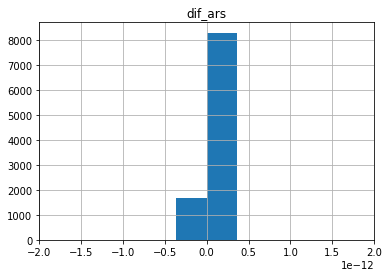

In [80]:
t_precios_ARS.hist(['dif_ars']);

In [81]:
t_precios_USD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85919 entries, 0 to 121219
Data columns (total 9 columns):
id                  85919 non-null int64
precio_original     85919 non-null float64
moneda_original     85919 non-null object
precio_$            85919 non-null float64
precio_u$s_aprox    85919 non-null float64
sup_tot_m2          58979 non-null float64
sup_cub_m2          75722 non-null float64
precio_m2_u$s       58792 non-null float64
precio_m2           75720 non-null float64
dtypes: float64(7), int64(1), object(1)
memory usage: 6.6+ MB


In [82]:
#(a)
t_precios_USD['sup_calc'] = \
t_precios_USD['precio_u$s_aprox']/t_precios_USD['precio_m2_u$s']

In [83]:
t_precios_USD['dif_uss'] = t_precios_USD['sup_calc'] - t_precios_USD['sup_tot_m2']

In [84]:
t_precios_USD.sample(5)

,id,precio_original,moneda_original,precio_$,precio_u$s_aprox,sup_tot_m2,sup_cub_m2,precio_m2_u$s,precio_m2,sup_calc,dif_uss
10831,10831,"265,000.00",USD,"4,675,792.50","265,000.00",178.00,178.00,"1,488.76","1,488.76",178.00,0.00
4672,4672,"165,000.00",USD,"2,911,342.50","165,000.00",211.00,180.00,781.99,916.67,211.00,-0.00
17266,17266,"105,900.00",USD,"1,868,552.55","105,900.00",nan,42.00,nan,"2,521.43",nan,nan
69458,69458,"390,000.00",USD,"6,881,355.00","390,000.00",200.00,200.00,"1,950.00","1,950.00",200.00,0.00
54554,54554,"77,000.00",USD,"1,358,626.50","77,000.00",40.00,40.00,"1,925.00","1,925.00",40.00,0.00


In [85]:
t_precios_USD['dif_uss'].describe()

count   58,792.00
mean        -0.00
std          0.00
min         -0.00
25%          0.00
50%          0.00
75%          0.00
max          0.00
Name: dif_uss, dtype: float64

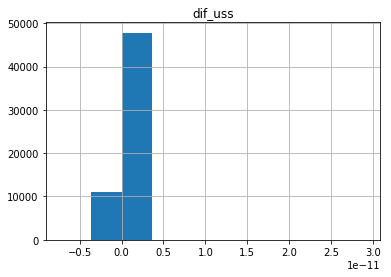

In [86]:
t_precios_USD.hist(['dif_uss']);

In [87]:
#(b)
t_precios_USD['sup_calc_2'] = \
t_precios_USD['precio_u$s_aprox']/t_precios_USD['precio_m2']

In [88]:
t_precios_USD['dif_uss_2'] = t_precios_USD['sup_calc_2'] - t_precios_USD['sup_tot_m2']

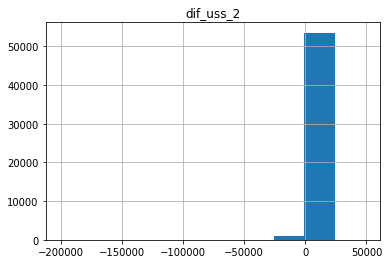

In [89]:
t_precios_USD.hist(['dif_uss_2']);

In [90]:
t_precios_USD['dif_uss_2'].describe()

count     54,521.00
mean        -100.63
std        1,513.98
min     -199,920.00
25%          -30.00
50%           -6.00
75%            0.00
max       48,948.00
Name: dif_uss_2, dtype: float64

In [91]:
t_precios_USD['dif_uss_3'] = t_precios_USD['sup_calc_2'] - t_precios_USD['sup_cub_m2']

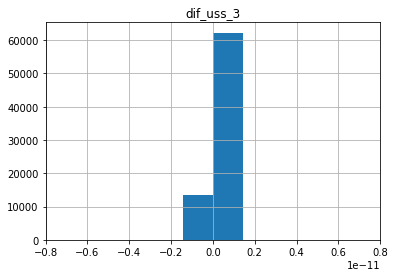

In [92]:
t_precios_USD.hist(['dif_uss_3']);

In [93]:
t_precios_USD['dif_uss_3'].describe()

count   75,720.00
mean        -0.00
std          0.00
min         -0.00
25%          0.00
50%          0.00
75%          0.00
max          0.00
Name: dif_uss_3, dtype: float64

In [94]:
#Verificamos que precio_original y precio_u$s_aprox son lo mismo

In [95]:
t_precios_USD['cotejo_1'] = t_precios_USD['precio_u$s_aprox'] - \
t_precios_USD['precio_original']

In [96]:
t_precios_USD['cotejo_1'].describe()

count   85,919.00
mean         0.00
std          0.00
min          0.00
25%          0.00
50%          0.00
75%          0.00
max          0.00
Name: cotejo_1, dtype: float64

In [97]:
# Se confirma el patron para todos los registros:
# Para moneda_original ARS, es consistente: precio_$ / precio_m2 = sup_cub_m2
# Para moneda_original USS, son consistentes: precio_u$s_aprox / precio_m2_u$s = sup_tot_m2 y
#                                             precio_u$s_aprox / precio_m2 = sup_cub_m2

# Regex

In [98]:
#Funciones de regex:

def buscar_cant_numeral(serie,palabra_clave):
    patron = r'(\d+)\s*({}\w*)'.format(palabra_clave)
    result = serie.str.extract(patron,re.IGNORECASE)
    return result

def buscar_cant_literal(serie,palabra_clave):
    regex_numeros = "uno|una|dos|tres|cuatro|cinco|seis|siete|ocho|nueve|cero|mono"
    patron = r'({})\s*({}\w*)'.format(regex_numeros,palabra_clave)
    result = serie.str.extract(patron,re.IGNORECASE)
    return result

def buscar_cant(serie,palabra_clave):
    numeral = buscar_cant_numeral(serie,palabra_clave)
    literal = buscar_cant_literal(serie,palabra_clave)
    dic= {"cero":0,"uno":1,"una":1,"mono":1,"dos":2,"tres":3,"cuatro":4,"cinco":5,"seis":6,"siete":7,"ocho":8,"nueve":9}
    literal =literal.loc[:,0].apply(lambda x: np.NaN if pd.isnull(x) else dic[str.lower(x)])
    numeral.iloc[:, 0].fillna(literal, inplace=True) 
    return numeral

def buscar_todas (serie,lista_palabras):
    resultado = pd.DataFrame(columns=["Cantidad","Descripcion"],index=serie.index)
    for clave in lista_palabras:
        df1 = buscar_cant(serie,clave)
        resultado.iloc[:, 0].fillna(df1.iloc[:,0], inplace=True)

    return resultado

In [99]:
ambientes_regexeados = buscar_todas(prop_sin_dupli["descr"],["amb","hab","room"])

In [100]:
ambientes_regexeados["Cantidad"].notnull().sum()

50859

In [101]:
m2_regexeados = buscar_todas(prop_sin_dupli["descr"],["m2","ms2","metros_?\s_cua","m^2","m²"])

In [102]:
m2_regexeados["Cantidad"].notnull().sum()

28417

In [103]:
(prop_sin_dupli["ambientes"].notnull() & ambientes_regexeados["Cantidad"].notnull()).sum()

24730

In [104]:
ambientes_regexeados["Cantidad"].apply(lambda x: np.NaN if pd.isnull(x) else int(x))

0        2.00
1         nan
2        2.00
3        3.00
4         nan
5         nan
6         nan
7        1.00
8        2.00
9         nan
10        nan
11       1.00
12       2.00
13       3.00
14        nan
15        nan
16       4.00
17       3.00
18        nan
19        nan
20        nan
21        nan
22        nan
23        nan
24       4.00
25       4.00
26        nan
27        nan
28       4.00
29        nan
         ... 
121182    nan
121183    nan
121184    nan
121185    nan
121186    nan
121187    nan
121189    nan
121190    nan
121191    nan
121193    nan
121194    nan
121196    nan
121197    nan
121198    nan
121199    nan
121200    nan
121202    nan
121203    nan
121205    nan
121207    nan
121210    nan
121211    nan
121212    nan
121213    nan
121214    nan
121215    nan
121216    nan
121217   1.00
121218   2.00
121219    nan
Name: Cantidad, Length: 116137, dtype: float64

In [105]:
#ambientes_regexeados["Cantidad"].apply(lambda x: x if x<10 else np.NaN)

In [106]:
def buscar_palabra(serie, palabra_clave):
    regex = r'({})'.format(palabra_clave)
    result = serie.str.extract(regex,re.IGNORECASE)
    return result


In [107]:
prop_sin_dupli["ambientes"].fillna(ambientes_regexeados["Cantidad"])

0           2
1         NaN
2           2
3           3
4         NaN
5         NaN
6         NaN
7        1.00
8        2.00
9         NaN
10        NaN
11          1
12          2
13       1.00
14       1.00
15        NaN
16       4.00
17       3.00
18        NaN
19       3.00
20        NaN
21       4.00
22        NaN
23       2.00
24       4.00
25       4.00
26        NaN
27        NaN
28       4.00
29       2.00
         ... 
121182    NaN
121183    NaN
121184    NaN
121185    NaN
121186    NaN
121187    NaN
121189    NaN
121190    NaN
121191    NaN
121193    NaN
121194    NaN
121196    NaN
121197    NaN
121198    NaN
121199    NaN
121200    NaN
121202    NaN
121203    NaN
121205    NaN
121207    NaN
121210    NaN
121211    NaN
121212    NaN
121213    NaN
121214    NaN
121215    NaN
121216    NaN
121217   1.00
121218      2
121219    NaN
Name: ambientes, Length: 116137, dtype: object

In [108]:
prop_sin_dupli["ambientes"].notna().sum()

46198

In [109]:
prop_sin_dupli["ambientes"].fillna(ambientes_regexeados["Cantidad"]).notna().sum()

72327

In [110]:
prop_sin_dupli.loc[(prop_sin_dupli["ambientes"].notna() & ambientes_regexeados["Cantidad"].notna()),["ambientes","ambientes_regexeados"]]

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,ambientes,ambientes_regexeados
13,1.00,nan
16,4.00,nan
17,3.00,nan
24,4.00,nan
25,4.00,nan
28,4.00,nan
33,3.00,nan
35,4.00,nan
38,3.00,nan
40,3.00,nan


In [111]:
m2_regexeados["Cantidad"].notna().sum()

28417

In [112]:
sum_calc_as_num = m2_regexeados["Cantidad"].apply(lambda x: np.NaN if pd.isnull(x) else int(x))

In [113]:
prop_sin_dupli["sup_d"]=sum_calc_as_num

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [114]:
prop_sin_dupli.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116137 entries, 0 to 121219
Data columns (total 24 columns):
id                  116137 non-null int64
t_prop              116137 non-null object
localidad           116137 non-null object
lugar_completo      116137 non-null object
provincia           116137 non-null object
geonames_id         97957 non-null float64
lat-lon             67850 non-null object
lat                 67850 non-null float64
lon                 67850 non-null float64
precio_original     98581 non-null float64
moneda_original     98581 non-null object
precio_$            98581 non-null float64
precio_u$s_aprox    98581 non-null float64
sup_tot_m2          77762 non-null float64
sup_cub_m2          97287 non-null float64
precio_m2_u$s       66851 non-null float64
precio_m2           85697 non-null float64
piso                7658 non-null float64
ambientes           46198 non-null float64
expenses?           14085 non-null float64
descr               116135 non-nu

In [115]:
#vamos a crear una unica columna de superficies ... verificando indices y reutilizando
#valores calculados previamente ...

psd_usd_index = prop_sin_dupli.loc[(prop_sin_dupli['moneda_original'] == 'USD') & \
                   (prop_sin_dupli['precio_u$s_aprox'].notna())].index

In [116]:
tpr_usd_index = t_precios_USD.loc[#(t_precios_USD['moneda_original'] == 'USD') & \
                   (prop_sin_dupli['precio_u$s_aprox'].notna())].index

In [117]:
#(psd_usd_index - tpr_usd_index != 0).sum()
(psd_usd_index != tpr_usd_index).sum()

0

In [118]:
psd_ars_index = prop_sin_dupli.loc[(prop_sin_dupli['moneda_original'] == 'ARS') & \
                   (prop_sin_dupli['moneda_original'].notna())].index

In [119]:
tpr_ars_index = t_precios_ARS.loc[(t_precios_ARS['moneda_original'] == 'ARS') & \
(t_precios_ARS['precio_$'].notna())].index

In [120]:
(psd_ars_index - psd_ars_index != 0).sum()

0

In [121]:
a_values = t_precios_USD['sup_calc'].values
#pd.Series(a_values)

In [122]:
b_values = t_precios_USD['sup_calc_2'].values

In [123]:
c_values = t_precios_ARS['sup_calc_arg'].values

In [124]:
prop_sin_dupli['sup_a'] = 0
prop_sin_dupli['sup_b'] = 0
prop_sin_dupli['sup_c'] = 0

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [125]:
#t_precios.loc[reemplazo_m2_uss_index,['precio_m2_u$s']] = reemplazo_m2_uss_values

prop_sin_dupli.loc[psd_usd_index,['sup_a']] = a_values

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [126]:
prop_sin_dupli.loc[psd_usd_index,['sup_b']] = b_values

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [127]:
prop_sin_dupli.loc[psd_ars_index,['sup_c']] = c_values

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [128]:
prop_sin_dupli.sample(3)

,id,t_prop,localidad,lugar_completo,provincia,geonames_id,lat-lon,lat,lon,precio_original,...,piso,ambientes,expenses?,descr,tit,duplicados,sup_d,sup_a,sup_b,sup_c
87983,87983,house,Córdoba,|Argentina|Córdoba|Córdoba|,Córdoba,"3,860,259.00",NaN,nan,nan,"1,500,000.00",...,nan,nan,nan,CASA APTA CRÉDITO! Barrio Dean Funes.Se vende ...,Casa - Dean Funes,False,100.00,0.00,0.00,96.00
54191,54191,house,Tigre,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre|,Bs.As. G.B.A. Zona Norte,"3,427,753.00","-34.361056,-58.6839801",-34.36,-58.68,"330,000.00",...,nan,nan,nan,*** SOBRE LOTE INTERNO | ESCUCHA LOTE EN PARTE...,Bustamante Propiedades | Villa Nueva en Venta,False,nan,240.00,204.00,0.00
19420,19420,house,Haras Santa Maria,|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Ha...,Bs.As. G.B.A. Zona Norte,nan,"-34.340601,-58.850434",-34.34,-58.85,"470,000.00",...,"1,450.00",5.00,nan,Corredor Responsable: Luis Alberto De Blas - C...,CASA EN DOS PLANTAS 4 DORMITORIOS LAS LOMAS,False,300.00,nan,282.00,0.00


In [129]:
#verificamos la correcta asignación

prop_sin_dupli.loc[113086]
prop

,id,t_prop,localidad,lugar_completo,provincia,geonames_id,lat-lon,lat,lon,precio_original,...,sup_tot_m2,sup_cub_m2,precio_m2_u$s,precio_m2,piso,ambientes,expenses?,descr,tit,duplicados
0,0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,"3,430,787.00","-34.6618237,-58.5088387",-34.66,-58.51,"62,000.00",...,55.00,40.00,"1,127.27","1,550.00",nan,nan,nan,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,False
1,1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,"3,432,039.00","-34.9038831,-57.9643295",-34.90,-57.96,"150,000.00",...,nan,nan,nan,nan,nan,nan,nan,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,False
2,2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,"3,430,787.00","-34.6522615,-58.5229825",-34.65,-58.52,"72,000.00",...,55.00,55.00,"1,309.09","1,309.09",nan,nan,nan,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,False
3,3,PH,Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,"3,431,333.00","-34.6477969,-58.5164244",-34.65,-58.52,"95,000.00",...,nan,nan,nan,nan,nan,nan,nan,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,False
4,4,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,"3,435,548.00","-38.0026256,-57.5494468",-38.00,-57.55,"64,000.00",...,35.00,35.00,"1,828.57","1,828.57",nan,nan,nan,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,False
5,5,house,Gualeguaychú,|Argentina|Entre Ríos|Gualeguaychú|,Entre Ríos,"3,433,657.00","-33.0140714,-58.519828",-33.01,-58.52,nan,...,53.00,nan,nan,nan,nan,nan,nan,"Casa en el perímetro del barrio 338, ubicada e...","Casa Barrio 338. Sobre calle 3 de caballería, ...",False
6,6,PH,Munro,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Bs.As. G.B.A. Zona Norte,"3,430,511.00","-34.5329567,-58.5217825",-34.53,-58.52,"130,000.00",...,106.00,78.00,"1,226.42","1,666.67",nan,nan,nan,MUY BUEN PH AL FRENTE CON ENTRADA INDEPENDIENT...,"MUY BUEN PH AL FRENTE DOS DORMITORIOS , PATIO,...",False
7,7,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,"3,436,077.00","-34.5598729,-58.443362",-34.56,-58.44,"138,000.00",...,45.00,40.00,"3,066.67","3,450.00",nan,nan,nan,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,False
8,8,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,"3,436,077.00","-34.5598729,-58.443362",-34.56,-58.44,"195,000.00",...,65.00,60.00,"3,000.00","3,250.00",nan,nan,nan,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",False
9,9,house,Rosario,|Argentina|Santa Fe|Rosario|,Santa Fe,"3,838,574.00","-32.942031,-60.7259192",-32.94,-60.73,"460,000.00",...,nan,nan,nan,nan,nan,nan,nan,MEDNOZA AL 7600A UNA CUADRA DE CALLE MENDOZAWH...,WHITE 7637 - 2 DORMITORIOS CON PATIO,False


In [130]:
prop_sin_dupli['sup_b'].sum()

10377380.0

In [131]:
prop_sin_dupli['sup_c'].sum()

811762.0

In [132]:
prop_sin_dupli['sup_a'].sum()

13900901.0

In [133]:
prop_sin_dupli['sup_calc'] = 0

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [134]:
prop_sin_dupli['sup_calc'] = prop_sin_dupli[['sup_a','sup_b','sup_c','sup_d']].median(axis=1,skipna=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [135]:
prop_sin_dupli.loc[:,['t_prop','localidad','sup_cub','sup_tot','sup_calc']].sample(5)

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,t_prop,localidad,sup_cub,sup_tot,sup_calc
24641,apartment,Mar del Plata,nan,nan,44.00
65213,apartment,Tigre,nan,nan,66.00
91450,house,Castelar,nan,nan,165.00
82124,apartment,San Lorenzo,nan,nan,0.00
85509,apartment,Rosario,nan,nan,0.00


In [136]:
prop_sin_dupli.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116137 entries, 0 to 121219
Data columns (total 28 columns):
id                  116137 non-null int64
t_prop              116137 non-null object
localidad           116137 non-null object
lugar_completo      116137 non-null object
provincia           116137 non-null object
geonames_id         97957 non-null float64
lat-lon             67850 non-null object
lat                 67850 non-null float64
lon                 67850 non-null float64
precio_original     98581 non-null float64
moneda_original     98581 non-null object
precio_$            98581 non-null float64
precio_u$s_aprox    98581 non-null float64
sup_tot_m2          77762 non-null float64
sup_cub_m2          97287 non-null float64
precio_m2_u$s       66851 non-null float64
precio_m2           85697 non-null float64
piso                7658 non-null float64
ambientes           46198 non-null float64
expenses?           14085 non-null float64
descr               116135 non-nu

In [137]:
prop_sin_dupli['precio_m2_u$s_calc'] = prop_sin_dupli['precio_u$s_aprox']/prop_sin_dupli['sup_calc']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [138]:
prop_sin_dupli['precio_m2_calc'] = prop_sin_dupli['precio_$']/prop_sin_dupli['sup_calc']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [139]:
prop_sin_dupli.loc[:,['precio_m2_u$s','precio_m2_u$s_calc']].sample(3)

,precio_m2_u$s,precio_m2_u$s_calc
71377,nan,nan
120828,nan,nan
112433,nan,"4,941.18"


In [140]:
prop_sin_dupli.loc[:,['precio_m2','precio_m2_calc']].sample(3)

,precio_m2,precio_m2_calc
72256,"1,319.02","23,273.42"
58387,"1,987.95","35,076.42"
40092,"2,743.14","96,802.57"


In [141]:
prop_sin_dupli['precio_m2_final'] = prop_sin_dupli[['precio_m2','precio_m2_calc']]\
.median(axis=1,skipna=True)

/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [142]:
prop_sin_dupli['tc'] = 0

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [143]:
prop_sin_dupli['tc'] = 17.64

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [144]:
prop_sin_dupli['precio_m2_conv'] = prop_sin_dupli['precio_m2_final'] / prop_sin_dupli['tc']

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [145]:
prop_sin_dupli[['precio_m2_conv']].sample(5)

,precio_m2_conv
55209,"2,799.64"
64658,"2,326.86"
17013,"1,154.55"
108092,"1,606.47"
54414,486.19


In [146]:
prop_sin_dupli['precio_m2_u$s_final'] = prop_sin_dupli[['precio_m2_u$s',\
                                                        'precio_m2_u$s_calc',\
                                                        'precio_m2_conv']]\
.median(axis=1,skipna=True)

/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:3250: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [147]:
prop_sin_dupli[['precio_m2_u$s_final']].sample(5)

,precio_m2_u$s_final
110743,950.69
93913,"2,448.98"
661,nan
65724,"3,870.97"
112040,"2,877.17"


In [148]:
prop_sin_dupli.loc[80722,['precio_m2_u$s_final']]

precio_m2_u$s_final   inf
Name: 80722, dtype: object

In [149]:
prop_sin_dupli["sup_calc"].replace(0,np.NaN,inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [150]:
prop_sin_dupli.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116137 entries, 0 to 121219
Data columns (total 34 columns):
id                     116137 non-null int64
t_prop                 116137 non-null object
localidad              116137 non-null object
lugar_completo         116137 non-null object
provincia              116137 non-null object
geonames_id            97957 non-null float64
lat-lon                67850 non-null object
lat                    67850 non-null float64
lon                    67850 non-null float64
precio_original        98581 non-null float64
moneda_original        98581 non-null object
precio_$               98581 non-null float64
precio_u$s_aprox       98581 non-null float64
sup_tot_m2             77762 non-null float64
sup_cub_m2             97287 non-null float64
precio_m2_u$s          66851 non-null float64
precio_m2              85697 non-null float64
piso                   7658 non-null float64
ambientes              46198 non-null float64
expenses?          

In [151]:
# hasta acá, las variables vigentes finales relacionadas a precio
#serían: precio_u$s_aprox, precio_$, sup_calc y precio_m2_u$s_final

In [152]:
prop2 = prop_sin_dupli.copy()

In [153]:
#Habría borrar descr y tit también ...
prop2.drop(['precio_original','moneda_original','lugar_completo','sup_tot_m2','sup_cub_m2','precio_m2',\
           'precio_m2_u$s','expenses?','duplicados','sup_a','sup_b','sup_c','precio_m2_u$s_calc',\
           'precio_m2_calc','precio_m2_final','tc','precio_m2_conv','sup_d'], axis=1, inplace=True)
prop2.columns

Index(['id', 't_prop', 'localidad', 'provincia', 'geonames_id', 'lat-lon',
       'lat', 'lon', 'precio_$', 'precio_u$s_aprox', 'piso', 'ambientes',
       'descr', 'tit', 'sup_calc', 'precio_m2_u$s_final'],
      dtype='object')

In [154]:
prop2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116137 entries, 0 to 121219
Data columns (total 16 columns):
id                     116137 non-null int64
t_prop                 116137 non-null object
localidad              116137 non-null object
provincia              116137 non-null object
geonames_id            97957 non-null float64
lat-lon                67850 non-null object
lat                    67850 non-null float64
lon                    67850 non-null float64
precio_$               98581 non-null float64
precio_u$s_aprox       98581 non-null float64
piso                   7658 non-null float64
ambientes              46198 non-null float64
descr                  116135 non-null object
tit                    116137 non-null object
sup_calc               83272 non-null float64
precio_m2_u$s_final    98581 non-null float64
dtypes: float64(9), int64(1), object(6)
memory usage: 15.1+ MB


# Incorporación de variables relevantes
#### Utilizamos regex para buscar contenido que puede influir en el precio

In [155]:
piscinas = buscar_palabra(prop_sin_dupli["descr"],"piscina").loc[:,0]
piscinas_tit = buscar_palabra(prop_sin_dupli["tit"],"piscina").loc[:,0]

In [156]:
piscinas_tit.notnull().sum()

573

In [157]:
piscinas =piscinas.fillna(piscinas_tit)

In [158]:
piletas = buscar_palabra(prop_sin_dupli["descr"],"piletas").loc[:,0]
piletastit = buscar_palabra(prop_sin_dupli["tit"],"piletas").loc[:,0]

In [159]:

print(piletas.notna().sum())
print(piletastit.notna().sum())
piletas = piletas.fillna(piletastit)
piletas.notna().sum()


664
1


665

In [160]:
piscinas = piscinas.fillna(piletas)
piscinas.notna().sum()

15028

In [161]:
prop_sin_dupli[piletas.notna() & piscinas.notnull()]["descr"].sample()

74682    Excelente local y Vivienda al fondo. Local de ...
Name: descr, dtype: object

In [162]:
cocheras =buscar_palabra(prop_sin_dupli["descr"],"cochera").loc[:,0]
cochera_tit = buscar_palabra(prop_sin_dupli["tit"],"cochera").loc[:,0]

coche = buscar_palabra(prop2["descr"],"coche").loc[:,0]
coche_tit = buscar_palabra(prop2["tit"],"coche").loc[:,0]


In [163]:
print(cocheras.notna().sum())
print(cochera_tit.notna().sum())
cocheras = cocheras.fillna(cochera_tit)
print(cocheras.notna().sum())
cocheras = cocheras.fillna(coche)
cocheras = cocheras.fillna(coche_tit)
print(cocheras.notna().sum())

40482
5930
41449
42796


In [164]:
prop2["Piscina"] = piscinas.notna()

In [165]:
prop2["Cochera"] = cocheras.notna()


In [166]:
patio = buscar_palabra(prop_sin_dupli["descr"],"patio").loc[:,0]
patio_tit = buscar_palabra(prop_sin_dupli["tit"],"patio").loc[:,0]

In [167]:
patio = patio.fillna(patio_tit)
patio.notna().sum()

21345

In [168]:
jardin = buscar_palabra(prop_sin_dupli["descr"],"jard[ií]n").loc[:,0]
jardin_tit = buscar_palabra(prop_sin_dupli["tit"],"jard[ií]n").loc[:,0]

print(jardin.notna().sum())
print(jardin_tit.notna().sum())
jardin = jardin.fillna(jardin_tit)
print(jardin.notna().sum())

16957
1040
17130


In [169]:
patio = patio.fillna(jardin)
patio.notna().sum()

34704

In [170]:
prop2["Patio"] = patio.notna()

In [171]:
preventa = buscar_palabra(prop_sin_dupli["descr"],"preventa").loc[:,0]
preventa_tit = buscar_palabra(prop_sin_dupli["tit"],"preventa").loc[:,0]

In [172]:
print(preventa.notna().sum())
preventa = preventa.fillna(preventa_tit)
print(preventa.notna().sum())

237
279


In [173]:
prop2["Preventa"] = preventa.notna()

In [174]:
prop2[preventa.notna()]


,id,t_prop,localidad,provincia,geonames_id,lat-lon,lat,lon,precio_$,precio_u$s_aprox,piso,ambientes,descr,tit,sup_calc,precio_m2_u$s_final,Piscina,Cochera,Patio,Preventa
561,561,apartment,José C Paz,Bs.As. G.B.A. Zona Norte,nan,"-34.5356741,-58.7449604",-34.54,-58.74,"752,071.93","42,623.59",nan,nan,DEPARTAMENTO 3 AMBIENTES / VENTA / CONDOMINIO ...,DEPARTAMENTO 3 AMBIENTES / VENTA / CONDOMINIO ...,nan,inf,False,True,True,True
562,562,apartment,José C Paz,Bs.As. G.B.A. Zona Norte,nan,"-34.5356741,-58.7449604",-34.54,-58.74,"633,323.74","35,893.55",nan,nan,DEPARTAMENTO 2 AMBIENTES / VENTA / CONDOMINIO ...,DEPARTAMENTO 2 AMBIENTES / VENTA / CONDOMINIO ...,nan,inf,False,True,True,True
1445,1445,apartment,Rosario,Santa Fe,"3,838,574.00","-32.9442426,-60.6505388",-32.94,-60.65,nan,nan,nan,2.00,ATENCION INVERSORES !! Mas de 48 proyectos en...,ATENCIÓN INVERSORES !! LOS LADRILLOS LA MEJO...,nan,nan,False,False,False,True
2060,2060,apartment,Caballito,Capital Federal,"3,435,874.00","-34.61597443,-58.42552567",-34.62,-58.43,nan,nan,nan,nan,Venta en Pozo - Gran oportunidad de inversión....,U$D 85.733 - Departamento en Venta - Belgrano ...,nan,nan,False,False,False,True
2775,2775,apartment,Córdoba,Córdoba,"3,860,259.00","-32.41650009,-63.24485016",-32.42,-63.24,nan,nan,nan,1.00,"Edificio en construcción de 14 pisos, 4000 mts...",U$D 52.000 - Departamento en Venta - Mariano M...,nan,nan,False,True,False,True
3799,3799,apartment,Almagro,Capital Federal,"3,436,397.00","-34.61595917,-58.42551422",-34.62,-58.43,nan,nan,nan,nan,Venta en Pozo - Gran oportunidad de inversión....,U$D 82.583 - Departamento en Venta - Belgrano ...,nan,nan,False,False,False,True
3801,3801,apartment,Almagro,Capital Federal,"3,436,397.00","-34.61595917,-58.42551422",-34.62,-58.43,nan,nan,nan,nan,Venta en Pozo - Gran oportunidad de inversión....,U$D 80.273 - Departamento en Venta - Belgrano ...,nan,nan,False,False,False,True
3946,3946,house,Los Pingüinos Country Club,Bs.As. G.B.A. Zona Oeste,nan,"-34.63887024,-58.67421722",-34.64,-58.67,nan,nan,nan,2.00,DUPLEX A ESTRENAR :: 3 AMBIENTES :: ITUZAINGOP...,U$D 115.000 - Casa en Venta - Lafayette S/N,nan,nan,False,False,True,True
3947,3947,house,Los Pingüinos Country Club,Bs.As. G.B.A. Zona Oeste,nan,"-34.63887787,-58.67417526",-34.64,-58.67,nan,nan,nan,3.00,DUPLEX A ESTRENAR :: 4 AMBIENTES :: ITUZAINGOP...,U$D 130.000 - Casa en Venta - Lafayette S/N,nan,nan,False,False,True,True
4398,4398,apartment,Caseros,Bs.As. G.B.A. Zona Oeste,"3,862,356.00","-34.609431,-58.566785",-34.61,-58.57,nan,nan,nan,3.00,Corredor Responsable: Mauro Marvisi - CMCPSI 5...,"SIN ADELANTO, SIN INTERÉS Y CUOTAS FIJAS.",nan,nan,False,False,False,True


In [175]:
#LLenamos los espacios faltantes con las medias locales

In [176]:
#Reemplazamos los "inf" con nan's para que no afecten las medias calculadas
prop2["precio_m2_u$s_final"].replace({np.inf:np.nan},inplace=True)

In [177]:
medias_locales = prop2.groupby(by="localidad",axis=0)["precio_m2_u$s_final"].transform('mean')
medias_regionales = prop2.groupby(by="provincia",axis=0)["precio_m2_u$s_final"].transform('mean')

In [178]:
medias_locales

0        2,111.23
1        2,144.38
2        2,111.23
3        2,625.10
4        2,084.64
5        1,388.11
6        2,695.22
7        3,634.36
8        3,634.36
9        4,139.18
10       4,727.06
11       2,015.10
12       3,579.75
13       3,564.95
14       3,564.95
15       2,643.60
16       2,111.23
17       2,775.08
18       4,695.43
19       4,514.43
20         337.44
21       4,514.43
22       2,178.97
23       4,236.64
24       1,976.73
25       1,976.73
26       1,441.68
27       1,615.64
28       1,976.73
29       2,801.13
           ...   
121182   4,727.06
121183   4,727.06
121184   4,727.06
121185   4,727.06
121186   4,727.06
121187   4,727.06
121189   4,727.06
121190   4,727.06
121191   4,727.06
121193   4,727.06
121194   4,727.06
121196   4,727.06
121197   4,727.06
121198   4,727.06
121199   4,727.06
121200   4,727.06
121202   4,727.06
121203   4,727.06
121205   4,727.06
121207   2,262.25
121210   3,579.75
121211   3,328.40
121212   3,328.40
121213   3,579.75
121214   3

In [179]:
prop2["precio_m2_u$s_final"].fillna(medias_locales,inplace=True)


In [180]:
prop2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116137 entries, 0 to 121219
Data columns (total 20 columns):
id                     116137 non-null int64
t_prop                 116137 non-null object
localidad              116137 non-null object
provincia              116137 non-null object
geonames_id            97957 non-null float64
lat-lon                67850 non-null object
lat                    67850 non-null float64
lon                    67850 non-null float64
precio_$               98581 non-null float64
precio_u$s_aprox       98581 non-null float64
piso                   7658 non-null float64
ambientes              46198 non-null float64
descr                  116135 non-null object
tit                    116137 non-null object
sup_calc               83272 non-null float64
precio_m2_u$s_final    115580 non-null float64
Piscina                116137 non-null bool
Cochera                116137 non-null bool
Patio                  116137 non-null bool
Preventa               

# Visualizacion y estadistica descriptiva

Observamos las medidas de tendencia central y desvios

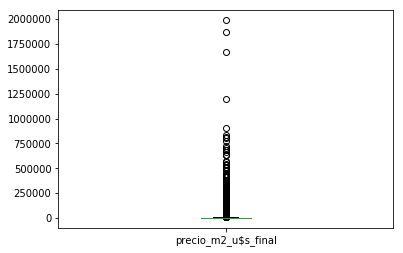

In [181]:
prop2[['precio_m2_u$s_final']].plot(kind='box')
plt.show()

In [182]:
media = prop2['precio_m2_u$s_final'].mean()
desvio = prop2['precio_m2_u$s_final'].std()
outliers_precio = prop2.loc[prop2['precio_m2_u$s_final']>(media +3*desvio),['precio_m2_u$s_final']].index

In [183]:
prop2.drop(outliers_precio,axis=0,inplace=True)

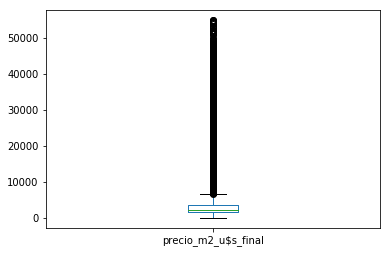

In [184]:
prop2[['precio_m2_u$s_final']].plot(kind='box')
plt.show()

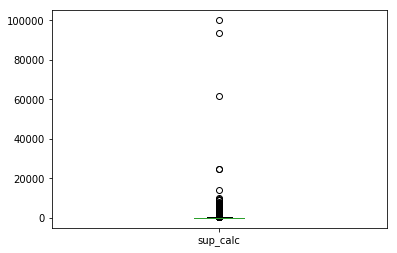

In [185]:
prop2[['sup_calc']].plot(kind='box')
plt.show()

In [186]:
media = prop2['sup_calc'].mean()
desvio = prop2['sup_calc'].std()
outliers_sup = prop2.loc[prop2['sup_calc']>(media +3*desvio),['sup_calc']].index

In [187]:
prop2.drop(outliers_sup,axis=0,inplace=True)

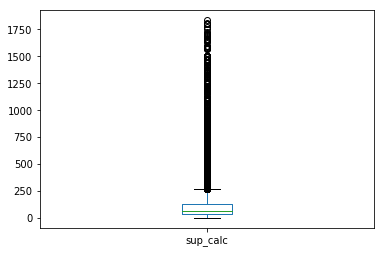

In [188]:
prop2[['sup_calc']].plot(kind='box')
plt.show()

In [199]:
#cantidad de departamentos segun cantidad de ambientes
prop_sin_dupli.pivot_table(values='id',index='ambientes',aggfunc='count',margins=True).head(15)

,id
ambientes,
1.00,7082
2.00,12072
3.00,12215
4.00,7814
5.00,3738
6.00,1395
7.00,766
8.00,407
9.00,184


In [194]:
#mejoras en cantidad de ambientes
prop_sin_dupli.pivot_table(values='ambientes',index='t_prop',aggfunc='count',margins=True)

,ambientes
t_prop,
PH,3184
apartment,30427
house,12484
store,103
All,46198
